# Sorting algorithms

In [1]:
import timeit
import unittest
import csv
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=20, edgeitems=5)
plt.rcParams['figure.figsize']=16,9
# plt.style.use('seaborn-lightgrid')

In [41]:
TEST_DIR = '../report/3/inc/'
SAVE_DIR = './'

In [3]:
def bubbleSort(A):
    n = len(A) - 1
    for i in range(n):
        ni = n-i
        for j in range(ni):
            if A[j] > A[j+1]:
                A[j], A[j+1] = A[j+1], A[j]

In [4]:
def bubbleSort2(A):
    n = len(A) - 1
    for i in range(n):
        swap = False
        for j in range(n-i):
            if A[j] > A[j+1]:
                A[j], A[j+1] = A[j+1], A[j]
                swap = True
        if not swap:
            break

In [5]:
def bubbleSort3(A):
    n = len(A) - 1
    for i in range(n):
        for j in range(n-i):
            if A[j] > A[j+1]:
                A[j], A[j+1] = A[j+1], A[j]

In [6]:
def insertionSort(A):
    n = len(A)
    for i in range(1, n):
        for j in range(i, 0, -1):
            if A[j] < A[j-1]:
                A[j], A[j-1] = A[j-1], A[j]
            else:
                break

In [7]:
def insertionSort2(A):
    n = len(A)
    for i in range(1, n):
        tmp = A[i]
        if tmp < A[i-1]:
            start = 0
            end = i-1
            while start != end:
                mid = (start+end)//2
                if tmp == A[mid]:
                    start = mid
                    break
                if tmp > A[mid]:
                    start = mid+1
                else:
                    end = mid
            for j in range(i, start, -1):
                A[j] = A[j-1]
            A[start] = tmp

In [8]:
def mergeSort(A):
    n = len(A)
    B = [None] * n
    k = 1
    while k < n:
        k2 = k * 2
        left_end = k
        while left_end < n:
            left = left_end - k
            right_end = left_end + k
            
            if right_end > n: right_end = n
                
            m = i = left
            j = left_end
            
            while i < left_end and j < right_end:
                if A[i] <= A[j]:
                    B[m] = A[i]
                    i += 1
                else:
                    B[m] = A[j]
                    j += 1
                m += 1
                
            if i < left_end:
                B[m:right_end] = A[i:left_end]
            else:
                B[m:right_end] = A[j:right_end]

            A[left:right_end] = B[left:right_end]

            left_end += k2
            
        k *= 2

# Utilities

In [9]:
def test(sort, arr):
#     print(sort.__name__)
    time = benchmark(sort, arr, key='inplace')
    n = len(arr)
    for i in range(n-1):
        if arr[i] > arr[i+1]:
            print('\n', False, ([i],arr[i]), ([i+1],arr[i+1]))
            return False, time
    return True, time

# arr sorted after first run so n should be 1
def benchmark(sort, arr, n=1, key=''):
    if key != 'inplace':
        a = arr.copy()
    else:
        a = arr
    return timeit.timeit(lambda: sort(a), number=n)

In [10]:
def testSet(n=2000, *, key=''):

    key = key.lower()
    arr = np.array(range(1, n+1))
    
    if not key:
        np.random.shuffle(arr)
    elif key == 'sorted':   # ascending
        pass
    elif key == 'reverse':  # descending
        arr = arr[::-1]
    elif key == '~sorted':
        tmp = np.random.randint(0, n-1, 10)
        for i in range(5):
            arr[i], arr[i+5] = arr[i+5], arr[i]
    elif key == '~reverse':
        arr = arr[::-1]
        tmp = np.random.randint(0, n-1, 10)
        for i in range(5):
            arr[i], arr[i+5] = arr[i+5], arr[i]
    elif key == 'duplicate':
        a = n//10
        arr = np.random.randint(1, a, n)
    elif key == 'equal':
        arr = np.array([1]*n)
    else:
        raise Exception
    return list(arr)

# Unit Test

In [11]:
class TestSort(unittest.TestCase):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.rand = testSet(200)
        self.file = TEST_DIR + 'func_test.csv'
        self.tests = []
        with open(self.file) as csvfile:
            text = csv.reader(csvfile, delimiter=',', quotechar='|')
            for line in text:
                self.tests.append([
                    [int(x) for x in line[0].split()],
                    [int(x) for x in line[1].split()]
                ])

    def test_bubble(self):
        self._test(bubbleSort)

    def test_insertion(self):
        self._test(insertionSort)

    def test_merge(self):
        self._test(bubbleSort)

    def _test(self, f):
        for t in self.tests:
            a = t[0].copy()
            f(a)
            self.assertEqual(a, t[1])
        self.assertTrue(test(f, self.rand))
        
unittest.main(argv=['1st-arg-ignored', '-v'], exit=False)

test_bubble (__main__.TestSort) ... ok
test_insertion (__main__.TestSort) ... ok
test_merge (__main__.TestSort) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.014s

OK


# Benchmark

In [12]:
# Worst case of merge sort
# https://stackoverflow.com/questions/24594112/when-will-the-worst-case-of-merge-sort-occur/24594419

def arr_worst_merge(n):
    A = list(range(n))
    B = [None] * n
    k = n
    while k > 1:
        k_2 = k // 2
        left_end = k_2
        while left_end < n:
            left = left_end - k_2
            right_end = left_end + k_2
            
            if right_end > n: right_end = n
                
            m = i = left
            j = left_end
            
            while i < left_end and j < right_end:
                B[j] = A[m]
                j += 1
                m += 1
                
                B[i] = A[m]
                i += 1
                m += 1

            for m in range(left, right_end):
                A[m] = B[m]

            left_end += k
            
        k //= 2
    
    return A

In [13]:
def benchmark_all(n_list, n_bench=1):
    l_list = len(n_list)
    # best, average, worst
    t_bubble = [[0] * 3 for i in range(l_list)]
    t_insert = [[0] * 3 for i in range(l_list)]
    t_merge  = [[0] * 3 for i in range(l_list)]
    for i in range(l_list):
        a_so = testSet(n_list[i], key='sorted')
        a_ra = testSet(n_list[i])
        a_re = testSet(n_list[i], key='reverse')
        a_wm = arr_worst_merge(n_list[i])

        for _ in range(n_bench):
            t_bubble[i][0] += benchmark(bubbleSort, a_so) / n_bench
            t_bubble[i][1] += benchmark(bubbleSort, a_ra) / n_bench
            t_bubble[i][2] += benchmark(bubbleSort, a_re) / n_bench

            t_insert[i][0] += benchmark(insertionSort, a_so) / n_bench
            t_insert[i][1] += benchmark(insertionSort, a_ra) / n_bench
            t_insert[i][2] += benchmark(insertionSort, a_re) / n_bench

            t_merge[i][0] += benchmark(mergeSort, a_so) / n_bench
            t_merge[i][1] += benchmark(mergeSort, a_ra) / n_bench
            t_merge[i][2] += benchmark(mergeSort, a_wm) / n_bench
    return t_bubble, t_insert, t_merge

In [14]:
n_list = list(range(100, 1100, 100))
t_bubble, t_insert, t_merge = benchmark_all(n_list, 10)

# Graph

In [32]:
def plot_helper(pic):
    plt.legend()
    plt.grid()
    plt.ylabel('Runtime (s)')
    plt.xlabel('n')
    plt.savefig(SAVE_DIR + pic, bbox_inches = 'tight')

In [16]:
# plt.style.use('bmh')

# plt.figure(figsize=(12,10))
# plt.ylim(0,50)

In [17]:
# labels = ['Bubble','Insertion','Merge']
labels = ['Best', 'Average', 'Worst']
baw_bubble = list(zip(*t_bubble))
baw_insert = list(zip(*t_insert))
baw_merge = list(zip(*t_merge))

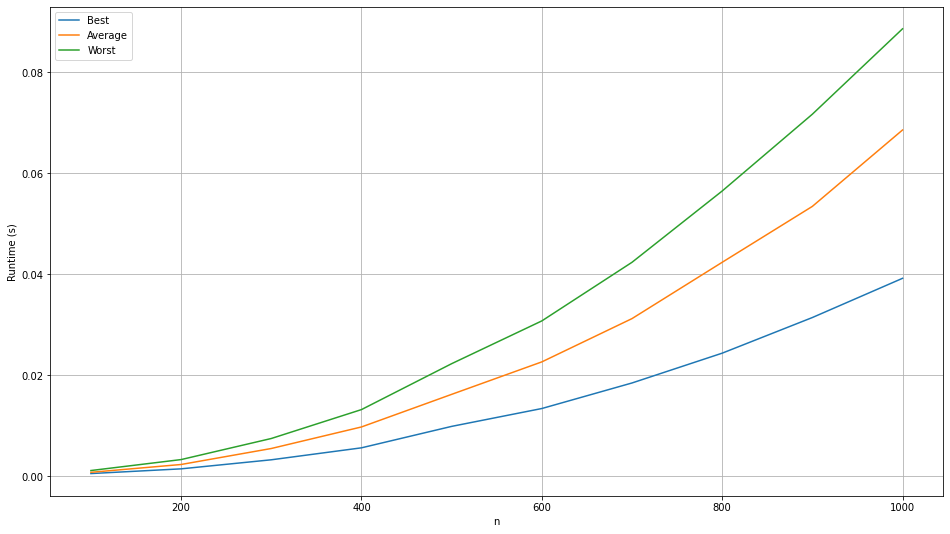

In [35]:
for i in range(len(labels)):
    plt.plot(n_list, baw_bubble[i], label=labels[i])
plot_helper('p1.png')

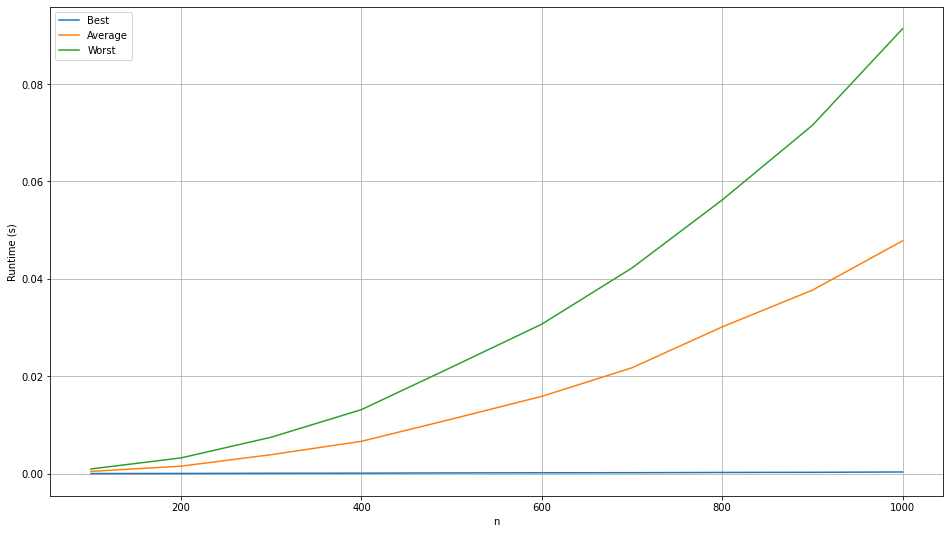

In [36]:
for i in range(len(labels)):
    plt.plot(n_list, baw_insert[i], label=labels[i])
plot_helper('p2.png')

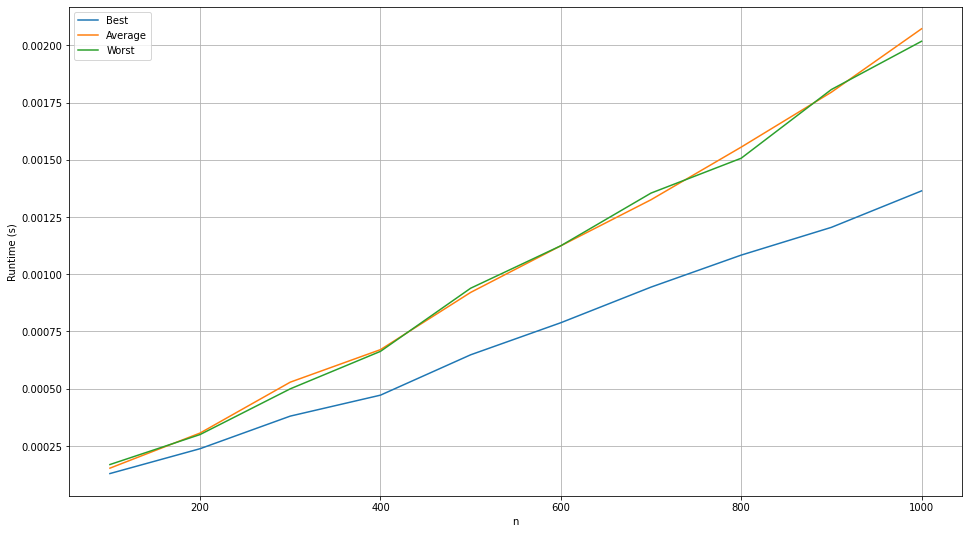

In [37]:
for i in range(len(labels)):
    plt.plot(n_list, baw_merge[i], label=labels[i])
plot_helper('p3.png')

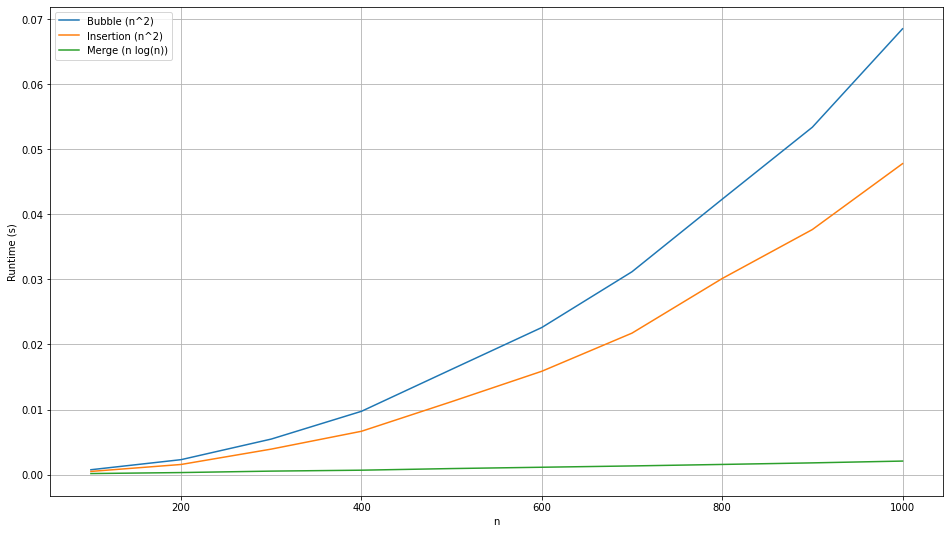

In [38]:
plt.plot(n_list, baw_bubble[1], label='Bubble (n^2) ')
plt.plot(n_list, baw_insert[1], label='Insertion (n^2)')
plt.plot(n_list, baw_merge[1], label='Merge (n log(n))')
plot_helper('p4.png')

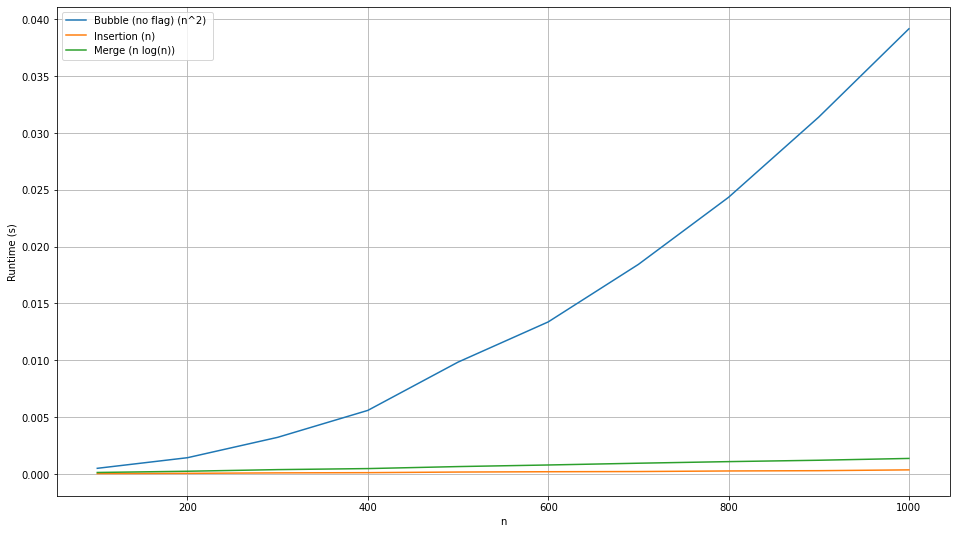

In [39]:
plt.plot(n_list, baw_bubble[0], label='Bubble (no flag) (n^2) ')
plt.plot(n_list, baw_insert[0], label='Insertion (n)')
plt.plot(n_list, baw_merge[0], label='Merge (n log(n))')
plot_helper('p5.png')

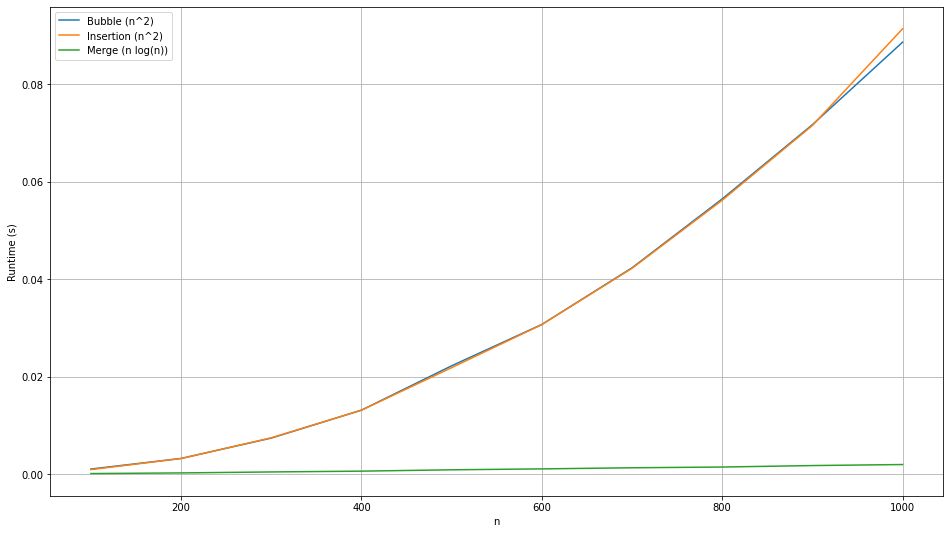

In [40]:
plt.plot(n_list, baw_bubble[2], label='Bubble (n^2) ')
plt.plot(n_list, baw_insert[2], label='Insertion (n^2)')
plt.plot(n_list, baw_merge[2], label='Merge (n log(n))')
plot_helper('p6.png')

In [24]:
n_test = [200,400]

def show_bench(n_list):
    bubble, insert, merge = benchmark_all(n_list)
    for i in range(len(n_list)):
        print('\nn = {}\t\tBest\t\tAverage\t\tWorst'.format(n_list[i]))
        print('==============')
        print('Bubble sort\t{:6f}\t{:6f}\t{:6f}'.format(*bubble[i]))
        print('Insertion sort\t{:6f}\t{:6f}\t{:6f}'.format(*insert[i]))
        print('Merge sort\t{:6f}\t{:6f}\t{:6f}'.format(*merge[i]))

arr_test = testSet(200)

def show_in_out(f, arr):
    print('Input:\t', np.array(arr))
    f(arr)
    print('Output:\t', np.array(arr))

show_in_out(mergeSort, arr_test)
show_bench(n_test)

Input:	 [127  84  95 118  24 ...  48 129 159  82 121]
Output:	 [  1   2   3   4   5 ... 196 197 198 199 200]

n = 200		Best		Average		Worst
Bubble sort	0.001561	0.003004	0.003542
Insertion sort	0.000063	0.002086	0.003538
Merge sort	0.000261	0.000521	0.000331

n = 400		Best		Average		Worst
Bubble sort	0.006672	0.010980	0.015303
Insertion sort	0.000125	0.007210	0.014699
Merge sort	0.000544	0.000812	0.000770


In [28]:
print(np.array(t_bubble))
print(np.array(t_insert))
print(np.array(t_merge))

[[0.00049463 0.00074132 0.00109447]
 [0.00142854 0.00229045 0.00326333]
 [0.00322061 0.00545648 0.00743689]
 [0.00559055 0.00972365 0.01316164]
 [0.00983662 0.01617876 0.02225283]
 [0.01337396 0.02260905 0.03072382]
 [0.01843342 0.03118113 0.0423309 ]
 [0.02433592 0.04233231 0.05644862]
 [0.03139333 0.05340377 0.07165923]
 [0.03916048 0.06853343 0.08857055]]
[[3.36321995e-05 4.81144300e-04 9.78146201e-04]
 [5.33357008e-05 1.55015220e-03 3.24972990e-03]
 [9.39564998e-05 3.91252700e-03 7.49597680e-03]
 [1.13677199e-04 6.65477050e-03 1.31558550e-02]
 [1.66837001e-04 1.12097619e-02 2.18735513e-02]
 [1.94031199e-04 1.58819847e-02 3.06990978e-02]
 [2.11302900e-04 2.17441112e-02 4.22279343e-02]
 [2.62319300e-04 3.01378774e-02 5.61826279e-02]
 [2.86727700e-04 3.76702483e-02 7.15027065e-02]
 [3.58234100e-04 4.78014332e-02 9.13193242e-02]]
[[0.00012908 0.00015266 0.00016846]
 [0.00023774 0.00030618 0.00029962]
 [0.00038015 0.0005285  0.00049934]
 [0.00047167 0.00067059 0.00066308]
 [0.00064804 0

In [57]:
# baw - best, average, worst
# Average
ave = np.column_stack((
    np.arange(100,1100,100),
    np.array(baw_bubble[1]),
    np.array(baw_insert[1]),
    np.array(baw_merge[1])
))
print(ave)

[[1.00000000e+02 7.41319700e-04 4.81144300e-04 1.52662101e-04]
 [2.00000000e+02 2.29044960e-03 1.55015220e-03 3.06182600e-04]
 [3.00000000e+02 5.45648230e-03 3.91252700e-03 5.28504401e-04]
 [4.00000000e+02 9.72365230e-03 6.65477050e-03 6.70594900e-04]
 [5.00000000e+02 1.61787644e-02 1.12097619e-02 9.20622199e-04]
 [6.00000000e+02 2.26090503e-02 1.58819847e-02 1.12435070e-03]
 [7.00000000e+02 3.11811294e-02 2.17441112e-02 1.32558590e-03]
 [8.00000000e+02 4.23323079e-02 3.01378774e-02 1.55558770e-03]
 [9.00000000e+02 5.34037671e-02 3.76702483e-02 1.79548820e-03]
 [1.00000000e+03 6.85334332e-02 4.78014332e-02 2.07265200e-03]]


In [65]:
with open('average.csv', 'w') as f:
    import pandas as pd
    df = pd.DataFrame(ave, columns=['n','bubble','insert','merge']).round(5)
    s = df.to_csv(index=None)
    f.write(s)
    print(s)

n,bubble,insert,merge
100.0,0.00074,0.00048,0.00015
200.0,0.00229,0.00155,0.00031
300.0,0.00546,0.00391,0.00053
400.0,0.00972,0.00665,0.00067
500.0,0.01618,0.01121,0.00092
600.0,0.02261,0.01588,0.00112
700.0,0.03118,0.02174,0.00133
800.0,0.04233,0.03014,0.00156
900.0,0.0534,0.03767,0.0018
1000.0,0.06853,0.0478,0.00207



In [82]:
t1, t2, t3 = ave[-1][1:]
print((t1-t3)/t3*100)
print((t2-t3)/t3*100)
print(t1/t3)
print(t2/t3)

3206.557645712581
2206.2932505550134
33.06557645712581
23.062932505550133


In [81]:
import math
1000 / math.log2(1000)

100.34333188799373